# 股票組合



In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
from bs4 import BeautifulSoup         
from urllib.request import urlopen
import json
from ipywidgets import IntProgress
from IPython.display import display
%matplotlib inline

In [2]:
headers = {'user-agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'}
stock_name = []
stock_category = []
for category in ['光電', '資訊服務', '生技醫療']:
    url = 'https://tw.stock.yahoo.com/h/kimosel.php?tse=1&cat=' + category + '&form=menu&form_id=stock_id&form_name=stock_name&domain=0'
    req = requests.get(url, headers=headers)
    stock_code_soup = BeautifulSoup(req.content)
    name_html = stock_code_soup.find_all('a', { "class" : "none" })
    name_list = list(map(lambda x: x.text.replace('\n', ''), name_html))
    stock_name.extend(name_list)
    stock_category.extend([category]*len(name_list))

//anaconda/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file //anaconda/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [3]:
stock_name

['2323 中環',
 '2340 光磊',
 '2349 錸德',
 '2374 佳能',
 '2393 億光',
 '2406 國碩',
 '2409 友達',
 '2426 鼎元',
 '2438 翔耀',
 '2448 晶電',
 '2466 冠西電',
 '2475 華映',
 '2486 一詮',
 '2489 瑞軒',
 '2491 吉祥全',
 '2499 東貝',
 '3008 大立光',
 '3019 亞光',
 '3024 憶聲',
 '3031 佰鴻',
 '3038 全台',
 '3049 和鑫',
 '3050 鈺德',
 '3051 力特',
 '3059 華晶科',
 '3149 正達',
 '3356 奇偶',
 '3383 新世紀',
 '3406 玉晶光',
 '3437 榮創',
 '3454 晶睿',
 '3481 群創',
 '3504 揚明光',
 '3514 昱晶',
 '3535 晶彩科',
 '3557 嘉威',
 '3561 昇陽光電',
 '3576 新日光',
 '3591 艾笛森',
 '3622 洋華',
 '3669 圓展',
 '3673 TPK-KY',
 '3698 隆達',
 '4934 太極',
 '4935 茂林-KY',
 '4942 嘉彰',
 '4956 光鋐',
 '4960 奇美材',
 '4976 佳凌',
 '5234 達興材料',
 '5243 乙盛-KY',
 '5259 清惠',
 '5484 慧友',
 '6116 彩晶',
 '6120 達運',
 '6131 悠克',
 '6164 華興',
 '6168 宏齊',
 '6176 瑞儀',
 '6209 今國光',
 '6225 天瀚',
 '6226 光鼎',
 '6278 台表科',
 '6289 華上',
 '6405 悅城',
 '6431 光麗-KY',
 '6443 元晶',
 '6456 GIS-KY',
 '6477 安集',
 '8072 陞泰',
 '8105 凌巨',
 '8215 明基材',
 '2427 三商電',
 '2453 凌群',
 '2468 華經',
 '2471 資通',
 '2480 敦陽',
 '3029 零壹',
 '3130 一零四',
 '4994 傳奇',
 '5

In [4]:
data_dict = ({'股票名稱': stock_name, '股票類別': stock_category})

In [5]:
stock_code = list(map(lambda x: x[0 : 4], stock_name))

In [6]:
headers = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'}
cook = {'Cookie':'buuid=YWd0a3ZmRDhVejdhQjQvbXpQZi9uaG5NM3hYTDR1TG9wTWtVQ1E2SWlVczFmdXBPaW5sQVZsV243NlIzcUZIKy0teDFacFNyeTMwcXBCYUJ5VDZwRGZzZz09--f5bcf31aa8a33f6dd9ec72124dc3096c6396c155; shouldShowFeedsFuncHint=true; upgrade_browser=1; _gali=member-limit; _gat=1; mp_mixpanel__c=15; _statementdog_session_v2=ZHI5VWY5dGd5KzY3MFNmd3hRNGVWc05QeWRPVHJRbWl0emxUMWM1S1NnUzJQcmFxWXl4UnBpellleGxlZlBMR1hhOUF2ODhxL04rZzZwZ2c3c2tsczFjZUlCeklHYmNmeWJZSE9UWGZrd1JoMjIvd2tyOGZUT0QwWVZwWEdqOWxVUDRDNHJsWGdObjZpaVM2L3U2UWhUOW42Y1lsZVg5YkxzLy8yYndra0JmTTVGa3d1cjZIc1g5RGRxZXhLczFqQlpzZHJ5UVk3TnNVR2RpK2swa25RdkFGLzRXYTljcmZscUJwWXRWdkMrMjNTM0N1OXNBbkhDKzZTTGJ0a2tNei0tZ0diNVJNZkV0QVdrY0RVenoyY2VKUT09--81dead01020f9e61c8a11b228ec1f0eb8da4db60; _ga=GA1.2.2100954631.1496722492; _gid=GA1.2.659090948.1497241354; mp_distinct_id=15c7b9ccc0e13b-0fd882e93b7f0e-3060750a-13c680-15c7b9ccc0f8ab; mp_2fc60276bfe20ef798d15c46e498d765_mixpanel=%7B%22distinct_id%22%3A%20%2215c7b9ccc0e13b-0fd882e93b7f0e-3060750a-13c680-15c7b9ccc0f8ab%22%2C%22%24search_engine%22%3A%20%22google%22%2C%22%24initial_referrer%22%3A%20%22https%3A%2F%2Fwww.google.com.tw%2F%22%2C%22%24initial_referring_domain%22%3A%20%22www.google.com.tw%22%2C%22__alias%22%3A%20%22234450%22%2C%22id%22%3A%20%22234450%22%2C%22Email%22%3A%20%22102701021%40nccu.edu.tw%22%7D; shouldShowAddTrackBtnHint=true'}
    
p = IntProgress()
p.max = len(stock_code)
p.description = 'Running'
display(p)
for index in range(len(stock_code)):
    url = 'https://statementdog.com/api/v1/fundamentals/' + stock_code[index] + '/2012/1/2017/4/'
    req = requests.get(url,cookies=cook,headers=headers)
    soup = BeautifulSoup(req.content)
    js = soup.p.string
    data = json.loads(js)
    p.value = index+1
    
    for i in ['197', '80', '78', '203', '204', '183', '160', '164', '18',
              '17', '271', '118', '51']:
        detail = data[i]['data'][-1][1]
        label = data[i]['label']
        if not label in data_dict.keys():
            data_dict[label] = []
        if detail == '負':
            data_dict[label].append(-1.)
        elif detail == '負轉正' or detail == '無':
            data_dict[label].append(0.)
        else:
            data_dict[label].append(float(detail))
            
    for i in ['185', '216', '217']:
        detail = list(map(lambda x: 0 if x[1] == '無' else float(x[1]), data[i]['data']))
        detail = sum(detail)/len(detail)
        label = data[i]['label']
        if not label in data_dict.keys():
            data_dict[label] = []
        data_dict[label].append(detail)
p.description = 'Done'

//anaconda/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file //anaconda/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [7]:
df = pd.DataFrame(data_dict, columns=['股票名稱', '股票類別', '投資現金流', '融資現金流', '營業現金流',
                                      '速動比','流動比', '營業利益', '稅前淨利',
                                      '業外收支佔稅前淨利比', '股價淨值比', '本益比', '研發費用率',
                                      '近4季營業利益年增率', '董監持股比率', 'EPS', 'ROE', 'ROA'])
df

,股票名稱,股票類別,投資現金流,融資現金流,營業現金流,速動比,流動比,營業利益,稅前淨利,業外收支佔稅前淨利比,股價淨值比,本益比,研發費用率,近4季營業利益年增率,董監持股比率,EPS,ROE,ROA
0,2323 中環,光電,-173975.0,-774298.0,-499540.0,164.03,202.50,-1728167.0,-511616.0,13.39,0.35,0.00,2.72,-1.00,8.79,-0.938,-8.126,-5.128
1,2340 光磊,光電,102131.0,-53769.0,302377.0,205.91,258.26,681716.0,223291.0,-12.52,1.22,10.72,5.53,39.87,8.35,1.008,7.312,5.018
2,2349 錸德,光電,491980.0,-939590.0,-290994.0,126.41,174.74,-1162470.0,-366611.0,40.09,0.73,0.00,1.51,-1.00,4.89,-1.106,-12.028,-6.894
3,2374 佳能,光電,-606357.0,-22897.0,246060.0,136.23,169.74,85146.0,30476.0,72.42,0.67,12.82,6.96,-77.36,4.39,1.506,6.366,3.588
4,2393 億光,光電,-1839009.0,802559.0,147050.0,178.12,198.25,2136020.0,422891.0,-35.97,1.22,12.73,2.63,23.03,7.32,3.666,9.122,4.782
5,2406 國碩,光電,-2264895.0,82029.0,64089.0,127.37,161.16,1258305.0,-243298.0,60.52,1.14,0.00,1.44,-82.87,4.69,-0.450,5.256,2.988
6,2409 友達,光電,-42267327.0,-74705.0,17285374.0,115.69,139.30,12338456.0,11949742.0,-0.57,0.61,5.06,2.76,748.33,7.02,-0.518,-2.278,0.154
7,2426 鼎元,光電,-276480.0,455290.0,28196.0,186.78,237.25,343491.0,-64287.0,210.29,1.23,23.65,3.64,1.81,8.34,-0.220,-5.292,-1.854
8,2438 翔耀,光電,-61245.0,19657.0,9298.0,244.19,264.32,54992.0,28520.0,-5.24,1.25,709.88,2.44,-49.95,33.50,-0.810,-6.924,-1.046
9,2448 晶電,光電,-285375.0,-143227.0,-143398.0,200.15,242.79,-1255776.0,-220368.0,289.25,0.70,0.00,6.00,0.00,3.76,-1.084,-2.898,-1.528


In [8]:
#df.to_csv('stock_data.csv')
#df = pd.read_csv('stock_data.csv')
#df

In [9]:
# 營業利益/稅前淨利
df['營業利益除稅前淨利'] = df.營業利益 / df.稅前淨利

# 投資現金流 融資現金流 營業現金流 本益比 股價淨值比 研發費用率 近4季營業利益年增率 董監持股比率 同業正規化
for category in ['光電', '資訊服務', '生技醫療']:
    for col in ['投資現金流', '融資現金流', '營業現金流', '本益比', '股價淨值比', '營業利益除稅前淨利', '研發費用率', '近4季營業利益年增率', '董監持股比率']:
        temp_df = df.loc[df.股票類別 == category]
        mean = temp_df[col].describe()['mean']
        ran = temp_df[col].describe()['max'] - temp_df[col].describe()['min']
        new_col = col + '_normal'
        df.loc[df.股票類別 == category, new_col] = (temp_df[col] - mean) / ran
    
# 速動比 流動比 同業標準化
for category in ['光電', '資訊服務', '生技醫療']:
    for col in ['速動比', '流動比']:
        temp_df = df.loc[df.股票類別 == category]
        mean = temp_df[col].describe()['mean']
        std = temp_df[col].describe()['std']
        new_col = col + '_stand'
        df.loc[df.股票類別 == category, new_col] = (temp_df[col] - mean) / std

df

,股票名稱,股票類別,投資現金流,融資現金流,營業現金流,速動比,流動比,營業利益,稅前淨利,業外收支佔稅前淨利比,...,融資現金流_normal,營業現金流_normal,本益比_normal,股價淨值比_normal,營業利益除稅前淨利_normal,研發費用率_normal,近4季營業利益年增率_normal,董監持股比率_normal,速動比_stand,流動比_stand
0,2323 中環,光電,-173975.0,-774298.0,-499540.0,164.03,202.50,-1728167.0,-511616.0,13.39,...,-0.020077,-0.049392,-0.055427,-0.024620,0.018981,-0.099208,0.012571,-0.151564,-0.067484,-0.047718
1,2340 光磊,光電,102131.0,-53769.0,302377.0,205.91,258.26,681716.0,223291.0,-12.52,...,0.013814,-0.021167,-0.040326,-0.015458,0.018266,0.096748,0.016987,-0.159870,0.259536,0.365541
2,2349 錸德,光電,491980.0,-939590.0,-290994.0,126.41,174.74,-1162470.0,-366611.0,40.09,...,-0.027852,-0.042052,-0.055427,-0.020618,0.018525,-0.183587,0.012571,-0.225190,-0.361239,-0.253458
3,2374 佳能,光電,-606357.0,-22897.0,246060.0,136.23,169.74,85146.0,30476.0,72.42,...,0.015266,-0.023149,-0.037368,-0.021250,0.017696,0.196469,0.004320,-0.234630,-0.284560,-0.290515
4,2393 億光,光電,-1839009.0,802559.0,147050.0,178.12,198.25,2136020.0,422891.0,-35.97,...,0.054093,-0.026634,-0.037494,-0.015458,0.022663,-0.105484,0.015167,-0.179315,0.042538,-0.079216
5,2406 國碩,光電,-2264895.0,82029.0,64089.0,127.37,161.16,1258305.0,-243298.0,60.52,...,0.020202,-0.029554,-0.055427,-0.016301,0.000166,-0.188469,0.003724,-0.228966,-0.353743,-0.354105
6,2409 友達,光電,-42267327.0,-74705.0,17285374.0,115.69,139.30,12338456.0,11949742.0,-0.57,...,0.012830,0.576590,-0.048299,-0.021882,0.013820,-0.096418,0.093538,-0.184979,-0.444946,-0.516117
7,2426 鼎元,光電,-276480.0,455290.0,28196.0,186.78,237.25,343491.0,-64287.0,210.29,...,0.037759,-0.030817,-0.022112,-0.015353,-0.000210,-0.035052,0.012874,-0.160059,0.110159,0.209828
8,2438 翔耀,光電,-61245.0,19657.0,9298.0,244.19,264.32,54992.0,28520.0,-5.24,...,0.017268,-0.031482,0.944573,-0.015142,0.015791,-0.118734,0.007281,0.314927,0.558445,0.410454
9,2448 晶電,光電,-285375.0,-143227.0,-143398.0,200.15,242.79,-1255776.0,-220368.0,289.25,...,0.009606,-0.036857,-0.055427,-0.020934,0.024088,0.129523,0.012679,-0.246523,0.214559,0.250887


In [10]:
df['分數'] = df['速動比_stand'] + df['流動比_stand'] + df['營業利益除稅前淨利_normal'] - df['股價淨值比_normal'] - df['本益比_normal'] + df['研發費用率_normal'] + df['近4季營業利益年增率_normal'] + df['董監持股比率_normal']
df = df.sort_values('分數', ascending=False)
df

,股票名稱,股票類別,投資現金流,融資現金流,營業現金流,速動比,流動比,營業利益,稅前淨利,業外收支佔稅前淨利比,...,營業現金流_normal,本益比_normal,股價淨值比_normal,營業利益除稅前淨利_normal,研發費用率_normal,近4季營業利益年增率_normal,董監持股比率_normal,速動比_stand,流動比_stand,分數
101,4108 懷特,生技醫療,-23164.0,0.0,-239665.0,2693.87,2834.18,-239230.0,-49857.0,-7.15,...,-0.210867,-0.144094,0.099194,0.139068,0.957880,0.022632,0.014075,5.109469,4.755378,11.043402
69,8072 陞泰,光電,397649.0,0.0,53850.0,792.34,894.39,31959.0,-10078.0,276.16,...,-0.029914,0.405186,-0.020513,0.004569,0.073038,0.007653,0.445567,4.838670,5.080143,10.064967
65,6431 光麗-KY,光電,-187830.0,0.0,-15587.0,765.23,798.32,-311815.0,-30799.0,-5.86,...,-0.032358,-0.055427,-0.018828,0.033827,-0.031565,0.012571,0.208263,4.626982,4.368132,9.292464
79,4994 傳奇,資訊服務,-36033.0,0.0,-164581.0,656.45,656.50,-127070.0,-68199.0,3.59,...,-0.227425,-0.564116,0.779487,-0.167919,0.836921,-0.886705,0.141792,2.352346,2.527656,4.588720
39,3622 洋華,光電,-248267.0,-275.0,-26404.0,376.80,400.80,-148167.0,-82079.0,77.35,...,-0.032739,-0.055427,-0.023251,0.015520,-0.035749,0.012571,0.077056,1.593929,1.421959,3.163964
40,3669 圓展,光電,-34699.0,12.0,-122253.0,298.67,345.82,136968.0,6323.0,-19.41,...,-0.036113,-0.034860,-0.020408,0.059217,0.590471,0.012679,0.344566,0.983852,1.014481,3.060534
16,3008 大立光,光電,-1114309.0,-39230.0,9815837.0,356.27,369.11,27913957.0,5722302.0,-16.85,...,0.313682,-0.016871,0.058046,0.022282,0.114181,0.014202,0.149928,1.433621,1.187092,2.880132
64,6405 悅城,光電,-55720.0,-14630.0,-24226.0,358.51,360.80,25601.0,-45028.0,68.64,...,-0.032662,-0.055427,-0.021987,0.010296,0.022829,0.004884,-0.024888,1.451112,1.125504,2.667150
19,3031 佰鴻,光電,-95609.0,-38996.0,34792.0,273.71,319.07,89483.0,18871.0,-36.00,...,-0.030585,-0.032367,-0.015985,0.021983,-0.212876,0.012679,0.549588,0.788952,0.816227,2.024903
30,3454 晶睿,光電,-132515.0,21446.0,-128631.0,214.59,306.79,577201.0,29640.0,-172.03,...,-0.036337,-0.036452,-0.004085,0.054402,0.642075,0.014449,0.091026,0.327314,0.725215,1.895018


In [11]:
df = df.loc[df.分數 > 2]
df

,股票名稱,股票類別,投資現金流,融資現金流,營業現金流,速動比,流動比,營業利益,稅前淨利,業外收支佔稅前淨利比,...,營業現金流_normal,本益比_normal,股價淨值比_normal,營業利益除稅前淨利_normal,研發費用率_normal,近4季營業利益年增率_normal,董監持股比率_normal,速動比_stand,流動比_stand,分數
101,4108 懷特,生技醫療,-23164.0,0.0,-239665.0,2693.87,2834.18,-239230.0,-49857.0,-7.15,...,-0.210867,-0.144094,0.099194,0.139068,0.957880,0.022632,0.014075,5.109469,4.755378,11.043402
69,8072 陞泰,光電,397649.0,0.0,53850.0,792.34,894.39,31959.0,-10078.0,276.16,...,-0.029914,0.405186,-0.020513,0.004569,0.073038,0.007653,0.445567,4.838670,5.080143,10.064967
65,6431 光麗-KY,光電,-187830.0,0.0,-15587.0,765.23,798.32,-311815.0,-30799.0,-5.86,...,-0.032358,-0.055427,-0.018828,0.033827,-0.031565,0.012571,0.208263,4.626982,4.368132,9.292464
79,4994 傳奇,資訊服務,-36033.0,0.0,-164581.0,656.45,656.50,-127070.0,-68199.0,3.59,...,-0.227425,-0.564116,0.779487,-0.167919,0.836921,-0.886705,0.141792,2.352346,2.527656,4.588720
39,3622 洋華,光電,-248267.0,-275.0,-26404.0,376.80,400.80,-148167.0,-82079.0,77.35,...,-0.032739,-0.055427,-0.023251,0.015520,-0.035749,0.012571,0.077056,1.593929,1.421959,3.163964
40,3669 圓展,光電,-34699.0,12.0,-122253.0,298.67,345.82,136968.0,6323.0,-19.41,...,-0.036113,-0.034860,-0.020408,0.059217,0.590471,0.012679,0.344566,0.983852,1.014481,3.060534
16,3008 大立光,光電,-1114309.0,-39230.0,9815837.0,356.27,369.11,27913957.0,5722302.0,-16.85,...,0.313682,-0.016871,0.058046,0.022282,0.114181,0.014202,0.149928,1.433621,1.187092,2.880132
64,6405 悅城,光電,-55720.0,-14630.0,-24226.0,358.51,360.80,25601.0,-45028.0,68.64,...,-0.032662,-0.055427,-0.021987,0.010296,0.022829,0.004884,-0.024888,1.451112,1.125504,2.667150
19,3031 佰鴻,光電,-95609.0,-38996.0,34792.0,273.71,319.07,89483.0,18871.0,-36.00,...,-0.030585,-0.032367,-0.015985,0.021983,-0.212876,0.012679,0.549588,0.788952,0.816227,2.024903


In [12]:
for col in ['EPS', 'ROE', 'ROA']:
    mean = df[col].describe()['mean']
    std = df[col].describe()['std']
    new_col = col + '_stand'
    df[new_col] = (df[col] - mean) / std
df

//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,股票名稱,股票類別,投資現金流,融資現金流,營業現金流,速動比,流動比,營業利益,稅前淨利,業外收支佔稅前淨利比,...,營業利益除稅前淨利_normal,研發費用率_normal,近4季營業利益年增率_normal,董監持股比率_normal,速動比_stand,流動比_stand,分數,EPS_stand,ROE_stand,ROA_stand
101,4108 懷特,生技醫療,-23164.0,0.0,-239665.0,2693.87,2834.18,-239230.0,-49857.0,-7.15,...,0.139068,0.957880,0.022632,0.014075,5.109469,4.755378,11.043402,-0.366887,-0.828596,-0.921149
69,8072 陞泰,光電,397649.0,0.0,53850.0,792.34,894.39,31959.0,-10078.0,276.16,...,0.004569,0.073038,0.007653,0.445567,4.838670,5.080143,10.064967,-0.252207,0.211603,0.328011
65,6431 光麗-KY,光電,-187830.0,0.0,-15587.0,765.23,798.32,-311815.0,-30799.0,-5.86,...,0.033827,-0.031565,0.012571,0.208263,4.626982,4.368132,9.292464,-0.348915,-0.570499,-0.591488
79,4994 傳奇,資訊服務,-36033.0,0.0,-164581.0,656.45,656.50,-127070.0,-68199.0,3.59,...,-0.167919,0.836921,-0.886705,0.141792,2.352346,2.527656,4.588720,-0.265010,0.530645,0.595995
39,3622 洋華,光電,-248267.0,-275.0,-26404.0,376.80,400.80,-148167.0,-82079.0,77.35,...,0.015520,-0.035749,0.012571,0.077056,1.593929,1.421959,3.163964,-0.529035,-1.425617,-1.423139
40,3669 圓展,光電,-34699.0,12.0,-122253.0,298.67,345.82,136968.0,6323.0,-19.41,...,0.059217,0.590471,0.012679,0.344566,0.983852,1.014481,3.060534,-0.330056,-0.230275,-0.185151
16,3008 大立光,光電,-1114309.0,-39230.0,9815837.0,356.27,369.11,27913957.0,5722302.0,-16.85,...,0.022282,0.114181,0.014202,0.149928,1.433621,1.187092,2.880132,2.656252,1.953553,1.975091
64,6405 悅城,光電,-55720.0,-14630.0,-24226.0,358.51,360.80,25601.0,-45028.0,68.64,...,0.010296,0.022829,0.004884,-0.024888,1.451112,1.125504,2.667150,-0.226406,0.769217,0.531409
19,3031 佰鴻,光電,-95609.0,-38996.0,34792.0,273.71,319.07,89483.0,18871.0,-36.00,...,0.021983,-0.212876,0.012679,0.549588,0.788952,0.816227,2.024903,-0.337737,-0.410031,-0.309578


In [13]:
df['第二階分數'] = 5*df['EPS_stand'] + 3*df['ROE_stand'] + 2*df['ROA_stand']
df = df.sort_values('第二階分數', ascending=False)
df

//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,股票名稱,股票類別,投資現金流,融資現金流,營業現金流,速動比,流動比,營業利益,稅前淨利,業外收支佔稅前淨利比,...,研發費用率_normal,近4季營業利益年增率_normal,董監持股比率_normal,速動比_stand,流動比_stand,分數,EPS_stand,ROE_stand,ROA_stand,第二階分數
16,3008 大立光,光電,-1114309.0,-39230.0,9815837.0,356.27,369.11,27913957.0,5722302.0,-16.85,...,0.114181,0.014202,0.149928,1.433621,1.187092,2.880132,2.656252,1.953553,1.975091,23.092100
64,6405 悅城,光電,-55720.0,-14630.0,-24226.0,358.51,360.80,25601.0,-45028.0,68.64,...,0.022829,0.004884,-0.024888,1.451112,1.125504,2.667150,-0.226406,0.769217,0.531409,2.238441
79,4994 傳奇,資訊服務,-36033.0,0.0,-164581.0,656.45,656.50,-127070.0,-68199.0,3.59,...,0.836921,-0.886705,0.141792,2.352346,2.527656,4.588720,-0.265010,0.530645,0.595995,1.458876
69,8072 陞泰,光電,397649.0,0.0,53850.0,792.34,894.39,31959.0,-10078.0,276.16,...,0.073038,0.007653,0.445567,4.838670,5.080143,10.064967,-0.252207,0.211603,0.328011,0.029796
40,3669 圓展,光電,-34699.0,12.0,-122253.0,298.67,345.82,136968.0,6323.0,-19.41,...,0.590471,0.012679,0.344566,0.983852,1.014481,3.060534,-0.330056,-0.230275,-0.185151,-2.711405
19,3031 佰鴻,光電,-95609.0,-38996.0,34792.0,273.71,319.07,89483.0,18871.0,-36.00,...,-0.212876,0.012679,0.549588,0.788952,0.816227,2.024903,-0.337737,-0.410031,-0.309578,-3.537936
65,6431 光麗-KY,光電,-187830.0,0.0,-15587.0,765.23,798.32,-311815.0,-30799.0,-5.86,...,-0.031565,0.012571,0.208263,4.626982,4.368132,9.292464,-0.348915,-0.570499,-0.591488,-4.639047
101,4108 懷特,生技醫療,-23164.0,0.0,-239665.0,2693.87,2834.18,-239230.0,-49857.0,-7.15,...,0.957880,0.022632,0.014075,5.109469,4.755378,11.043402,-0.366887,-0.828596,-0.921149,-6.162524
39,3622 洋華,光電,-248267.0,-275.0,-26404.0,376.80,400.80,-148167.0,-82079.0,77.35,...,-0.035749,0.012571,0.077056,1.593929,1.421959,3.163964,-0.529035,-1.425617,-1.423139,-9.768301


In [14]:
stock_detail = dict()
Rt = []
stock_name = df.股票名稱.tolist()
#stock_name = ['2330 台積電', '2317 鴻海']
p = IntProgress()
p.max = len(stock_name)
p.description = 'Running'
display(p)
for name in stock_name:
    p.value = stock_name.index(name)+1
    code = name[0 : 4]
    url = 'https://finance.yahoo.com/quote/' + code + '.TW/history?period1=1339430400&period2=1497196800&interval=1mo&filter=history&frequency=1mo'
    soup = BeautifulSoup(urlopen(url))
    a = soup.find_all('span')
    i_from = soup.find_all('span', {'data-reactid': '54'})
    for i in range(len(a)-1, 0, -1):
        if 'Close' in a[i].text:
            break
    d = a[a.index(i_from[0]) : i]
    index = 0
    stock_detail[name] = []
    while index < len(d):
        if d[index+1].text == 'Dividend' or d[index+1].text == 'Stock Split':
            index += 2
            continue
        num = d[index+4].text
        while ',' in num:
            num = num.replace(',', '')
        stock_detail[name].append(float(num))
        index += 7
    temp_front = stock_detail[name][1:]
    temp_end = stock_detail[name][:-1]
    rev = [(i - j) / j for (i, j) in zip(temp_end, temp_front)]
    if len(rev) < 59:
        df = df.loc[df['股票名稱'] != name]
        del stock_detail[name]
        continue
    Rt.append(rev)
p.description = 'Done'

//anaconda/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file //anaconda/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [15]:
pd.DataFrame(stock_detail)

,3008 大立光,3031 佰鴻,3622 洋華,3669 圓展,4108 懷特,4994 傳奇,8072 陞泰
0,4810.0,17.20,13.05,20.90,28.40,71.40,20.40
1,4750.0,17.85,12.50,20.70,28.65,75.10,20.30
2,5015.0,16.85,12.20,20.80,28.80,67.10,21.10
3,4780.0,18.15,12.85,20.45,31.00,64.50,22.15
4,4560.0,13.20,13.95,23.65,31.25,66.90,22.30
5,4450.0,12.00,12.40,21.40,29.80,72.00,21.85
6,3735.0,12.55,11.85,20.00,30.55,66.60,22.25
7,3690.0,11.05,12.10,20.90,29.95,70.90,20.10
8,3735.0,9.80,12.05,21.00,29.60,58.00,21.65
9,3795.0,10.25,14.30,19.50,32.35,49.75,23.30


In [16]:
if len(df) > 3:
    df = df[:3]
    Rt = Rt[:3]
df

,股票名稱,股票類別,投資現金流,融資現金流,營業現金流,速動比,流動比,營業利益,稅前淨利,業外收支佔稅前淨利比,...,研發費用率_normal,近4季營業利益年增率_normal,董監持股比率_normal,速動比_stand,流動比_stand,分數,EPS_stand,ROE_stand,ROA_stand,第二階分數
16,3008 大立光,光電,-1114309.0,-39230.0,9815837.0,356.27,369.11,27913957.0,5722302.0,-16.85,...,0.114181,0.014202,0.149928,1.433621,1.187092,2.880132,2.656252,1.953553,1.975091,23.092100
79,4994 傳奇,資訊服務,-36033.0,0.0,-164581.0,656.45,656.50,-127070.0,-68199.0,3.59,...,0.836921,-0.886705,0.141792,2.352346,2.527656,4.588720,-0.265010,0.530645,0.595995,1.458876
69,8072 陞泰,光電,397649.0,0.0,53850.0,792.34,894.39,31959.0,-10078.0,276.16,...,0.073038,0.007653,0.445567,4.838670,5.080143,10.064967,-0.252207,0.211603,0.328011,0.029796


$$ \overline {R}=\dfrac {1} {T}\sum _{t=1}^{T}R_{t} $$

In [17]:
Rt

[[0.01263157894736842,
  -0.05284147557328016,
  0.049163179916317995,
  0.04824561403508772,
  0.024719101123595506,
  0.19143239625167335,
  0.012195121951219513,
  -0.012048192771084338,
  -0.015810276679841896,
  0.06601123595505617,
  0.04093567251461988,
  0.16129032258064516,
  0.08272058823529412,
  0.19823788546255505,
  -0.09018036072144289,
  -0.015779092702169626,
  0.06736842105263158,
  0.046255506607929514,
  -0.09741550695825049,
  -0.007889546351084813,
  -0.009765625,
  -0.152317880794702,
  -0.057722308892355696,
  -0.09078014184397164,
  0.03070175438596491,
  0.11038961038961038,
  0.14285714285714285,
  -0.0036968576709796672,
  0.02462121212121212,
  0.1022964509394572,
  0.0041928721174004195,
  0.117096018735363,
  -0.020642201834862386,
  -0.1191919191919192,
  0.06223175965665236,
  -0.02100840336134454,
  0.21428571428571427,
  0.03978779840848806,
  0.3090277777777778,
  0.07063197026022305,
  0.15450643776824036,
  -0.0411522633744856,
  0.1516587677725118

In [18]:
R_bar = list(map(lambda x: sum(x)/len(x), Rt))
R_bar

[0.03943126383673579, -0.014598479638481815, -0.021973292928913455]

$$ \sigma _{ij}=\dfrac {1} {T-1}\sum _{t=1}^{T}\left( R_{i,t}-\overline {R}_{i}\right) \times \left( R_{j,t}-\overline {R}_{j}\right) $$

In [19]:
def cov(R_i, R_j, R_i_bar, R_j_bar):
    s = 0
    T = len(R_i)
    for t in range(T):
        s += (R_i[t] - R_i_bar) * (R_j[t] - R_j_bar)
    s = s/(T-1)
    
    return s

$$ R_{p}=\sum _{i}x_{i}\overline {R}_{i} $$

In [20]:
def Rp(w, R_bar):
    s = 0
    for i in range(len(w)):
        s += w[i] * R_bar[i]
        
    return s

$$ Var\left( R_{p}\right) =\sum _{i}\sum _{j}x_{i}x_{j}\sigma _{ij} $$

In [21]:
def var(w, Rt, R_bar):
    s = 0
    for i in range(len(w)):
        for j in range(len(w)):
            s += w[i] * w[j] * cov(Rt[i], Rt[j], R_bar[i], R_bar[j])
    
    return s

In [22]:
W = []
if len(Rt) == 2:
    for i in range(0, 101, 5):
        j = 100 - i
        if j <= 0:
            break
        W.append([i/100., j/100.])
elif len(Rt) == 3:
    for i in range(0, 101, 5):
        for j in range(0, 101-i, 5):
            k = 100 - i - j
            if k < 0:
                break
            W.append([i/100., j/100., k/100.])
W

[[0.0, 0.0, 1.0],
 [0.0, 0.05, 0.95],
 [0.0, 0.1, 0.9],
 [0.0, 0.15, 0.85],
 [0.0, 0.2, 0.8],
 [0.0, 0.25, 0.75],
 [0.0, 0.3, 0.7],
 [0.0, 0.35, 0.65],
 [0.0, 0.4, 0.6],
 [0.0, 0.45, 0.55],
 [0.0, 0.5, 0.5],
 [0.0, 0.55, 0.45],
 [0.0, 0.6, 0.4],
 [0.0, 0.65, 0.35],
 [0.0, 0.7, 0.3],
 [0.0, 0.75, 0.25],
 [0.0, 0.8, 0.2],
 [0.0, 0.85, 0.15],
 [0.0, 0.9, 0.1],
 [0.0, 0.95, 0.05],
 [0.0, 1.0, 0.0],
 [0.05, 0.0, 0.95],
 [0.05, 0.05, 0.9],
 [0.05, 0.1, 0.85],
 [0.05, 0.15, 0.8],
 [0.05, 0.2, 0.75],
 [0.05, 0.25, 0.7],
 [0.05, 0.3, 0.65],
 [0.05, 0.35, 0.6],
 [0.05, 0.4, 0.55],
 [0.05, 0.45, 0.5],
 [0.05, 0.5, 0.45],
 [0.05, 0.55, 0.4],
 [0.05, 0.6, 0.35],
 [0.05, 0.65, 0.3],
 [0.05, 0.7, 0.25],
 [0.05, 0.75, 0.2],
 [0.05, 0.8, 0.15],
 [0.05, 0.85, 0.1],
 [0.05, 0.9, 0.05],
 [0.05, 0.95, 0.0],
 [0.1, 0.0, 0.9],
 [0.1, 0.05, 0.85],
 [0.1, 0.1, 0.8],
 [0.1, 0.15, 0.75],
 [0.1, 0.2, 0.7],
 [0.1, 0.25, 0.65],
 [0.1, 0.3, 0.6],
 [0.1, 0.35, 0.55],
 [0.1, 0.4, 0.5],
 [0.1, 0.45, 0.45],
 [0.1, 0.5, 

In [23]:
X = list(map(lambda x: var(x, Rt, R_bar)**(0.5), W))
Y = list(map(lambda x: Rp(x, R_bar), W))

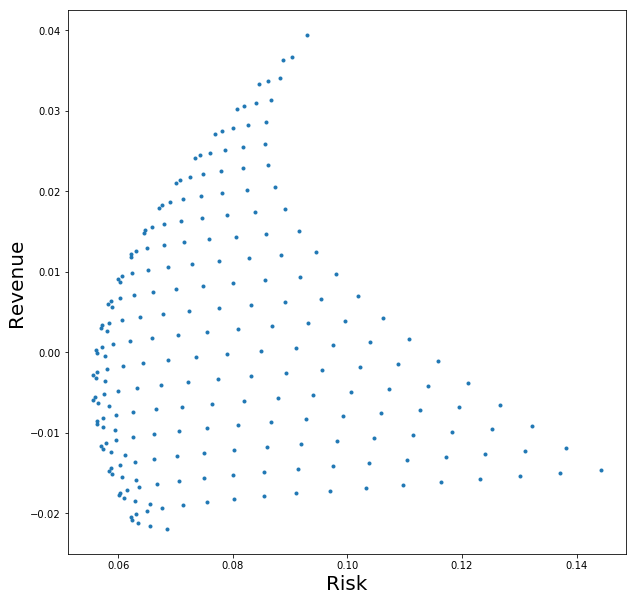

In [24]:
fig = plt.figure()
fig.set_size_inches(10, 10)
plt.xlabel("Risk", fontsize=20)
plt.ylabel("Revenue", fontsize=20)
plt.plot(X, Y, '.')
plt.show()

In [25]:
fig.savefig('result.jpg')